In [33]:
import numpy as np
import copy as cpy
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

stopbandAttenuation = float(input("Enter the value of Stopband Attenuation: "))
passbandRipple = float(input("Enter the value of Passband Ripple: "))
transitionWidth= float(input("Enter the value of Transition Width: "))
samplingFrequency = float(input("Enter the value of Sampling Frequency: "))
idealCutoffFrequency = float(input("Enter the value of Ideal Cutoff Frequency: "))
print("Stopband Attenuation--:  %d dB"%(int(stopbandAttenuation)))
print("Passband Ripple-------:  %f dB" %(passbandRipple))
print("Transition Width------:  %f Hz"%(transitionWidth))
print("Sampling Frequency----:  %f Hz"%(samplingFrequency))
print("Ideal Cutoff Frequency:  %f Hz"%(idealCutoffFrequency))


Stopband Attenuation--:  40 dB
Passband Ripple-------:  0.010000 dB
Transition Width------:  500.000000 Hz
Sampling Frequency----:  10000.000000 Hz
Ideal Cutoff Frequency:  1200.000000 Hz


In [43]:


def CalBeta(A):
    if(A<=21):
        return 0
    elif(A>21 and A<50):                ### Does not match with theory and example
        return 0.5842*pow((A-21),0.4) + 0.07886*(A-21)
    else:
        return 0.1102*(A-0.87)


def ZerothOrderModifiedBessel(x):
    y = 1
    L = 24
    factk = 1

    for k in range(1,L):
        factk*= k
        y+= pow((pow(x/2,k)/factk),2)

    return y


def w(n, N, beta):
    y = 0
    if((-(N-1)/2) <= n and ((N-1)/2)>= n):
        nom = ZerothOrderModifiedBessel(beta*pow((1- pow((2*n/(N-1)),2)),0.5))
        denom = ZerothOrderModifiedBessel(beta)        
        y = nom/denom
    else:
        y = 0

    return y




delP = pow(10,(passbandRipple/20))-1
delS = pow(10,(stopbandAttenuation/-20))
Del = min(delP,delS)


print("delP:  %f    delS:  %f  del:  %f"%(delP,delS,Del))

A = -20*np.log10(Del)
print("A:  %f "%(A))

delF = transitionWidth/samplingFrequency
print("DelF:  %f"%(delF))

N = np.ceil((A-7.95)/(14.36*delF))
print("N:  %d"%(N))

beta = CalBeta(A)
print("Beta:  %f"%(beta))

cuttoffFrequency = (idealCutoffFrequency + (transitionWidth)/2)/samplingFrequency

print("cuttoffFrequency:  %f "%(cuttoffFrequency))

low = 0
hi = N
h = []
hd =[]
window=[]
for i in range(0,int(N/2)+1):
    if(i==0):
       hD = 2*cuttoffFrequency
       W = w(i,N,beta)
       hd.append(hD)
       h.append(hD*W)
       window.append(W)
    else:
       hD = np.sin((2*np.pi*i*cuttoffFrequency))/(i*np.pi)
       W = w(i,N,beta)
       hd.append(hD)
       h.append(hD*W)
       window.append(W)


h.reverse()


l = 0
r = N-1
for i in range(0,len(h)):
    scientific_notation="{:.2e}".format(h[i])
    print("h[%d]=---------------------------  %s -------------------------------=h[%d]"%(i,scientific_notation,r))
    r-= 1


delP:  0.001152    delS:  0.010000  del:  0.001152
A:  58.771286 
DelF:  0.050000
N:  71
Beta:  6.380722
cuttoffFrequency:  0.145000 
h[0]=---------------------------  4.33e-05 -------------------------------=h[70]
h[1]=---------------------------  -6.95e-05 -------------------------------=h[69]
h[2]=---------------------------  -2.46e-04 -------------------------------=h[68]
h[3]=---------------------------  -2.83e-04 -------------------------------=h[67]
h[4]=---------------------------  1.60e-05 -------------------------------=h[66]
h[5]=---------------------------  5.56e-04 -------------------------------=h[65]
h[6]=---------------------------  8.68e-04 -------------------------------=h[64]
h[7]=---------------------------  4.28e-04 -------------------------------=h[63]
h[8]=---------------------------  -7.50e-04 -------------------------------=h[62]
h[9]=---------------------------  -1.82e-03 -------------------------------=h[61]
h[10]=---------------------------  -1.60e-03 ------

In [44]:
win = []

win = cpy.deepcopy(window)

win.reverse()
win.pop()

for i in range(0,len(window)):
    win.append(window[i])
print(win)



[0.010497507734423518, 0.017435444802435442, 0.02616278805882837, 0.03685921204219532, 0.049690943297757535, 0.06480627179246577, 0.08233113688919216, 0.10236489136582047, 0.12497634726922698, 0.15020020517172825, 0.17803396363029986, 0.20843539838386896, 0.2413206911739025, 0.2765632762147907, 0.3139934585101249, 0.3533988427011097, 0.39452559428505796, 0.4370805372368577, 0.48073407371753213, 0.5251238930958958, 0.5698594193863792, 0.6145269288619731, 0.6586952534670257, 0.7019219711376476, 0.7437599716107628, 0.7837642760947761, 0.8214989815607583, 0.8565441956072073, 0.8885028260013662, 0.9170070901819442, 0.9417246142242742, 0.9623639979476836, 0.978679732841024, 0.9904763720812854, 0.9976118668424785, 1.0, 0.9976118668424785, 0.9904763720812854, 0.978679732841024, 0.9623639979476836, 0.9417246142242742, 0.9170070901819442, 0.8885028260013662, 0.8565441956072073, 0.8214989815607583, 0.7837642760947761, 0.7437599716107628, 0.7019219711376476, 0.6586952534670257, 0.6145269288619731,

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

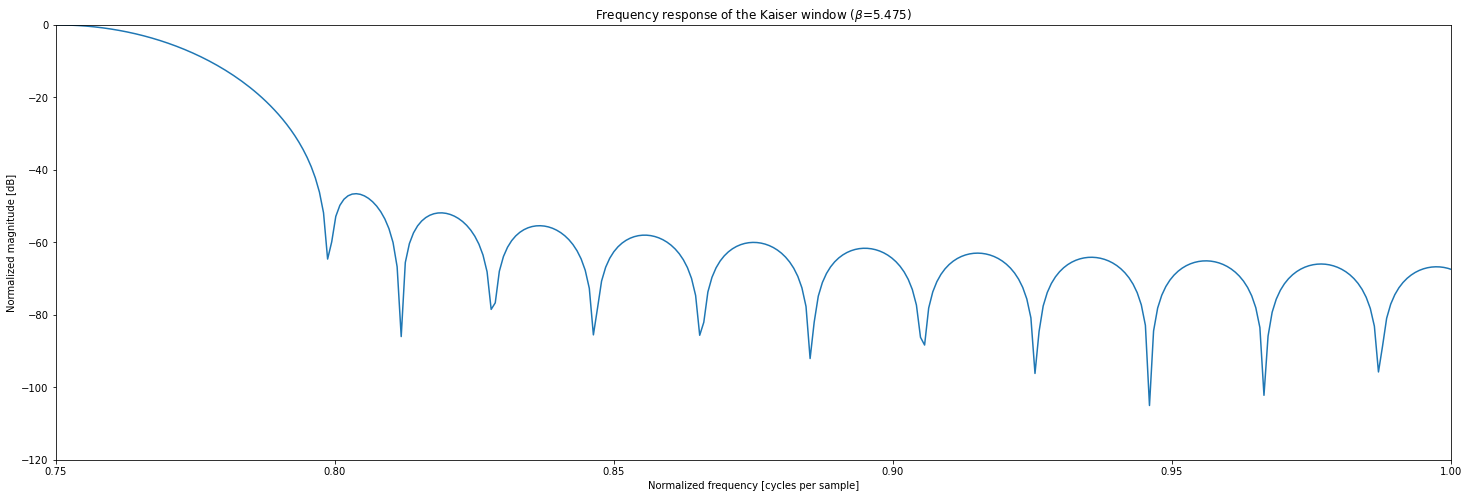

In [45]:
A = fft(win, 2048) / (len(win)/2.0)
freq = np.linspace(0, 1.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

plt.figure(figsize=(25, 8))
plt.plot(freq, response)
plt.axis([0.75, 1, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=5.475)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


